##CREDIT CARD FRAUD DETECTION





Credit card fraud detection is essential for financial security, and machine learning models help identify fraudulent transactions by analyzing patterns and anomalies. The process involves data preprocessing, normalization, and handling class imbalance using techniques like SMOTE or undersampling. A classification model such as logistic regression, random forests, or decision trees is trained on split datasets and evaluated using metrics like precision, recall, and F1-score. Feature engineering improves accuracy by analyzing transaction behavior, while advanced methods like ensemble learning and anomaly detection enhance detection. Once optimized, the model can be deployed for real-time fraud prevention, minimizing financial losses while ensuring a seamless user experience.

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier

# 2. Reading the Dataset

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#First 5 rows of the dataset

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Last 5 rows of the dataset

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Shape of the dataset


In [ ]:
print(data.shape)

(284807, 31)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.fillna({'Amount': data['Amount'].median()}, inplace=True)

pca_features = [f'V{i}' for i in range(1, 29)]
data[pca_features] = data[pca_features].apply(lambda col: col.fillna(col.mean()))

data.dropna(subset=['Class'], inplace=True)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Checking for missing data after preprocessing


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#Heatmap for Correlation:

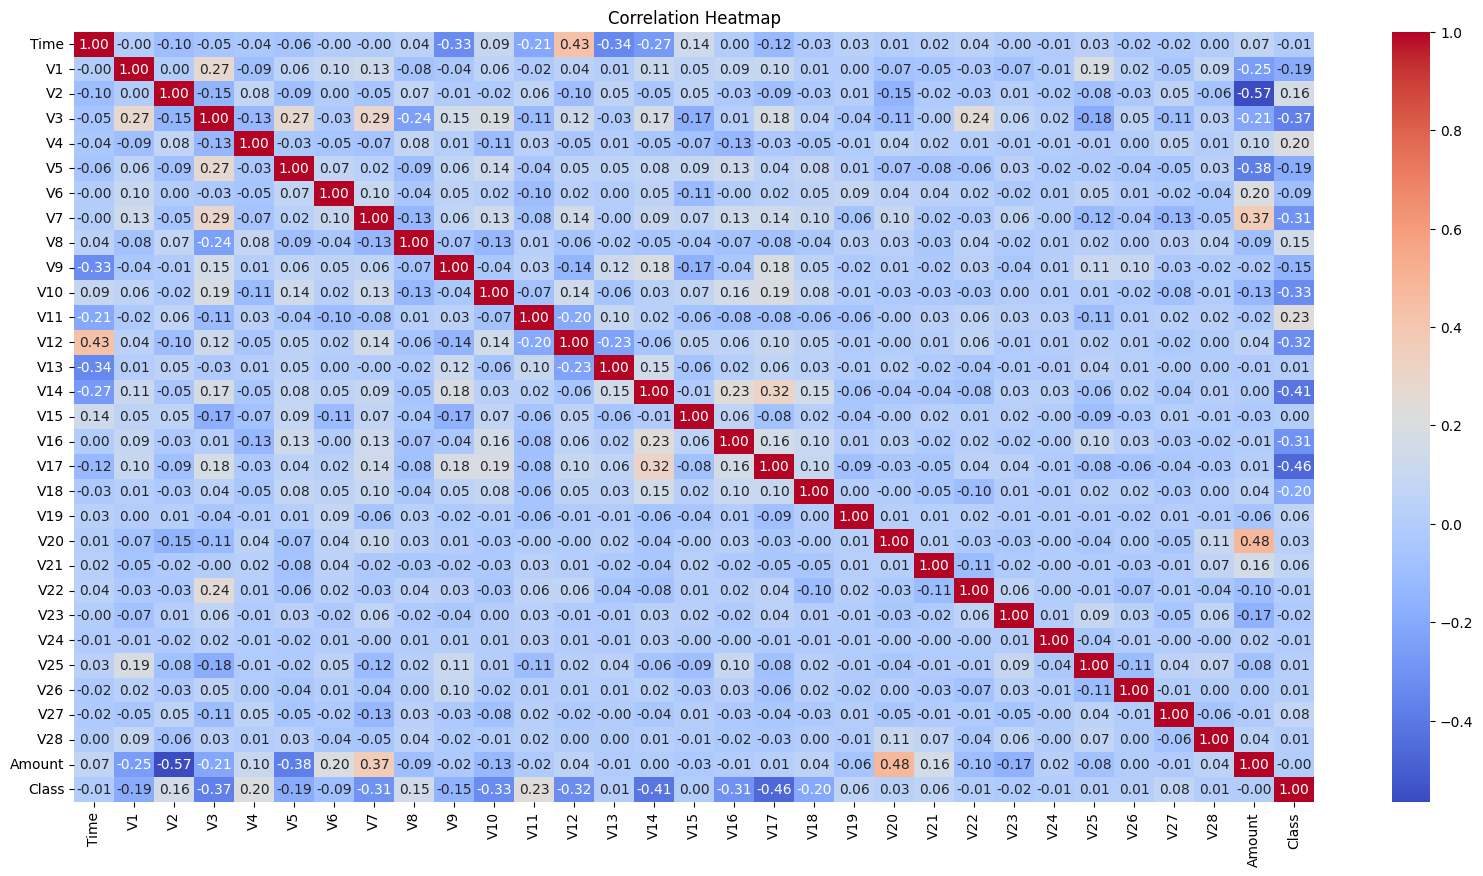

In [ ]:
plt.figure(figsize=(20,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.001843,-0.099330,-0.053286,-0.038215,-0.063395,-0.004957,-0.002576,0.035855,-0.331486,...,0.017168,0.036230,-0.002395,-0.009749,0.030622,-0.022087,-0.020999,0.000853,0.066789,-0.012097
V1,-0.001843,1.000000,0.002415,0.272988,-0.090719,0.055743,0.097935,0.132944,-0.075243,-0.036606,...,-0.052041,-0.028581,-0.070437,-0.009881,0.185033,0.024095,-0.051495,0.087441,-0.254761,-0.191664
V2,-0.099330,0.002415,1.000000,-0.147642,0.076764,-0.085517,0.001786,-0.053713,0.072667,-0.013429,...,-0.015348,-0.032610,0.013164,-0.019291,-0.079323,-0.028250,0.051145,-0.064440,-0.565171,0.160687
V3,-0.053286,0.272988,-0.147642,1.000000,-0.126878,0.271039,-0.025698,0.291907,-0.243239,0.154804,...,-0.001973,0.242307,0.059755,0.019627,-0.180178,0.048735,-0.105314,0.029034,-0.211027,-0.370601
V4,-0.038215,-0.090719,0.076764,-0.126878,1.000000,-0.034185,-0.052254,-0.069243,0.079830,0.013897,...,0.020246,0.013171,-0.014847,-0.005037,-0.009305,0.003059,0.049556,0.008261,0.100454,0.202897
V5,-0.063395,0.055743,-0.085517,0.271039,-0.034185,1.000000,0.066090,0.021988,-0.090049,0.062335,...,-0.075195,-0.058915,0.033255,-0.017131,-0.019151,-0.038927,-0.054199,0.029813,-0.378657,-0.186269
V6,-0.004957,0.097935,0.001786,-0.025698,-0.052254,0.066090,1.000000,0.097968,-0.044533,0.047075,...,0.038933,0.022826,-0.024792,0.009485,0.049108,0.009309,-0.017399,-0.035084,0.201658,-0.090266
V7,-0.002576,0.132944,-0.053713,0.291907,-0.069243,0.021988,0.097968,1.000000,-0.134812,0.063286,...,-0.023163,-0.028308,0.063769,-0.002167,-0.116077,-0.041622,-0.130073,-0.045110,0.368109,-0.306626
V8,0.035855,-0.075243,0.072667,-0.243239,0.079830,-0.090049,-0.044533,-0.134812,1.000000,-0.065221,...,-0.034944,0.039886,-0.020384,0.008152,0.020365,0.003481,0.028858,0.043206,-0.093262,0.148142
V9,-0.331486,-0.036606,-0.013429,0.154804,0.013897,0.062335,0.047075,0.063286,-0.065221,1.000000,...,-0.021726,0.028641,-0.038963,0.009738,0.108291,0.100988,-0.029098,-0.018905,-0.021712,-0.150868


#Removing the Columns which has less relation with Class Label

In [ ]:
low_correlation_threshold = 0.05
correlation_matrix = data.corr()

correlation_with_survived = correlation_matrix['Class'].abs()

# Identify columns with correlation above the threshold
columns_to_keep = correlation_with_survived[correlation_with_survived >= low_correlation_threshold].index

# Drop columns with correlation below the threshold
data = data[columns_to_keep]

print("Filtered Columns):")
col = data.columns
print(col)

Filtered Columns):
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V27', 'Class'],
      dtype='object')


# Plot the distribution of the target variable

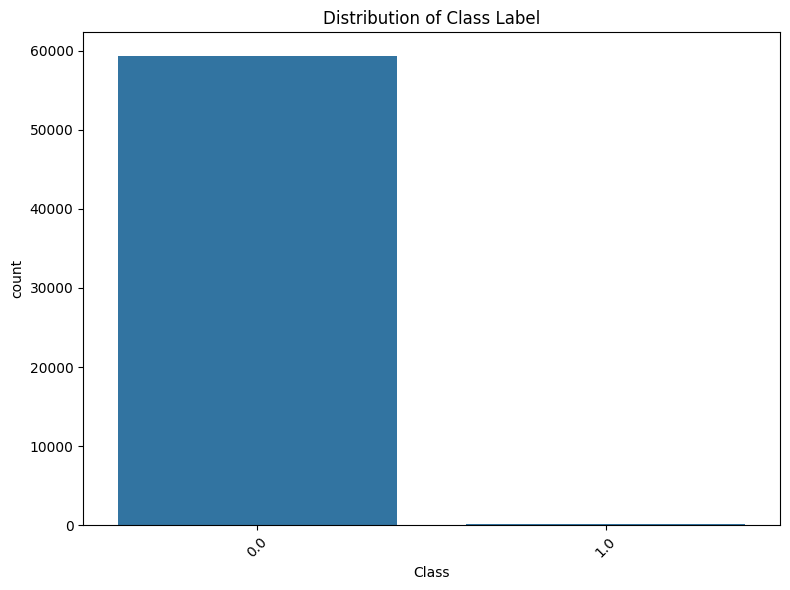

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Display the updated DataFrame

In [ ]:
col = data.columns
print(col)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V27', 'Class'],
      dtype='object')


In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.133558,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.008983,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,-0.055353,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.062723,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0.219422,0.0


#4. Splitting the data

In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (59510, 19)
y shape: (59510,)


In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,V27
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.133558
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.008983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,-0.055353
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.062723
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0.219422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59505,1.015555,-1.162519,-0.165417,-0.601962,-1.139883,-1.046207,0.049107,-0.386753,-0.830868,0.462037,-0.631347,0.184570,-0.038742,-1.764498,0.342269,0.500087,-0.410885,-0.332061,-0.135061
59506,0.846847,-0.740109,1.734920,0.973051,-0.908455,1.955373,-1.282036,0.785884,1.530679,-0.658000,0.265297,1.417372,-0.897490,-1.723682,1.640293,-2.478598,-1.465838,0.108577,0.107897
59507,-0.293073,0.287754,1.076909,-1.498707,0.030389,-0.094332,0.592840,-0.236917,-1.592913,0.801238,1.150543,0.071682,0.142590,-1.565716,-0.125591,0.646055,-0.274176,-0.702190,-0.462258
59508,-2.728620,2.789470,-0.019110,-0.345316,-0.983749,-0.665490,-0.452156,1.174699,0.050815,0.611769,-0.975942,1.035169,0.214586,0.548947,-0.294942,-0.093197,-0.038604,-0.080194,-0.341898


In [ ]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
59505,0.0
59506,0.0
59507,0.0
59508,0.0


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original class distribution in y_train:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nResampled class distribution in y_train_resampled:")
print(y_train_resampled.value_counts())

Original class distribution in y_train:
Class
0.0    47474
1.0      134
Name: count, dtype: int64

Resampled class distribution in y_train_resampled:
Class
0.0    47474
1.0    47474
Name: count, dtype: int64



# Check class distribution before and after resampling


In [ ]:
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Original class distribution: Class
0.0    47474
1.0      134
Name: count, dtype: int64
Resampled class distribution: Class
0.0    47474
1.0    47474
Name: count, dtype: int64


In [ ]:
# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (47608, 19)
Testing features shape: (11902, 19)
Training labels shape: (47608,)
Testing labels shape: (11902,)


##5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    l1_ratio=None,
)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[11872,     2],
       [   12,    16]])

In [ ]:
 from sklearn.metrics import classification_report
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11874
         1.0       0.89      0.57      0.70        28

    accuracy                           1.00     11902
   macro avg       0.94      0.79      0.85     11902
weighted avg       1.00      1.00      1.00     11902

---------------------------------------------------------------------


In [ ]:

print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


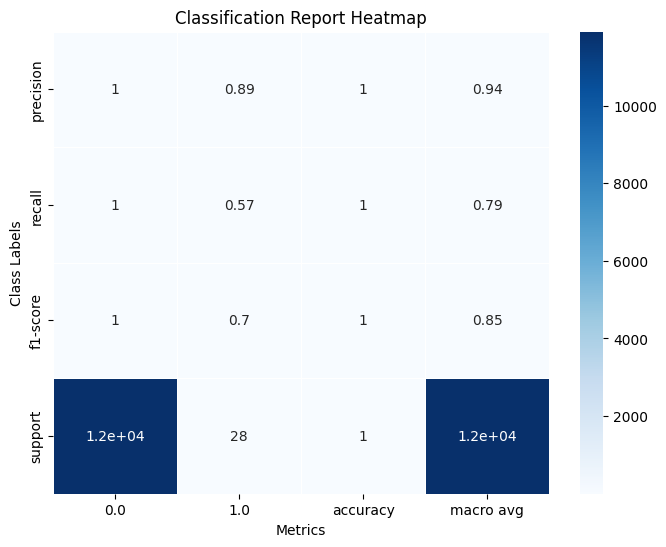

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", linewidths=0.5)

plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Class Labels")
plt.show()

#B. Implementation of SVM and analysing the perfomance

In [ ]:
 from sklearn.svm import SVC
 svc_model = SVC(kernel='linear',random_state=1234, gamma= 'scale')
 svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[11871,     3],
       [   10,    18]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11874
         1.0       0.86      0.64      0.73        28

    accuracy                           1.00     11902
   macro avg       0.93      0.82      0.87     11902
weighted avg       1.00      1.00      1.00     11902

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


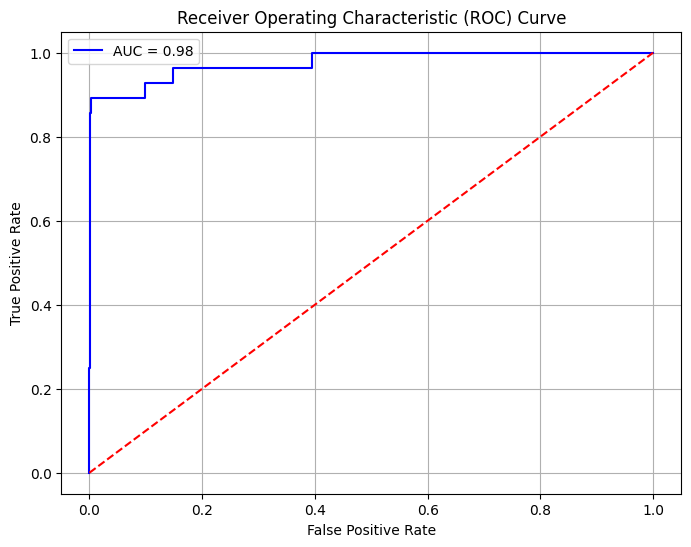

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, svc_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='dashed')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

#C. Implimenting KNN Classifier and analysing the perfomance

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[11873,     1],
       [    6,    22]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11874
         1.0       0.96      0.79      0.86        28

    accuracy                           1.00     11902
   macro avg       0.98      0.89      0.93     11902
weighted avg       1.00      1.00      1.00     11902

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


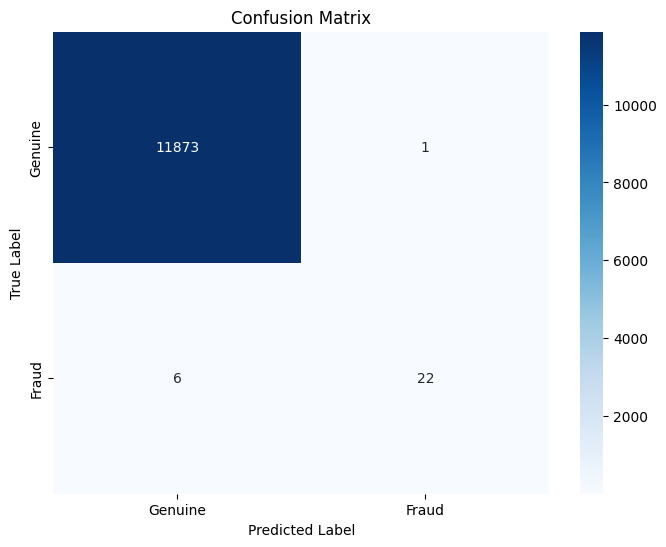

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11874
         1.0       0.95      0.64      0.77        28

    accuracy                           1.00     11902
   macro avg       0.97      0.82      0.88     11902
weighted avg       1.00      1.00      1.00     11902



# Confusion Matrix

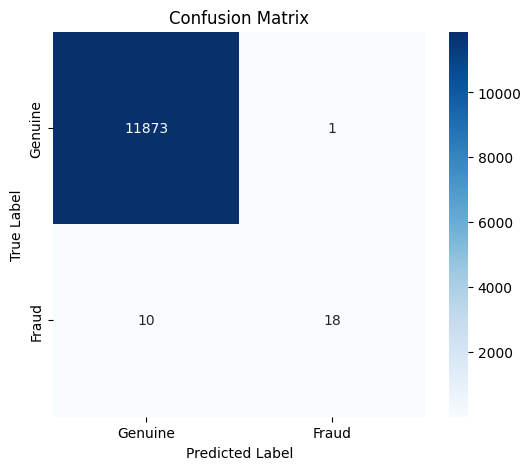

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



# ROC Curve

In [ ]:
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

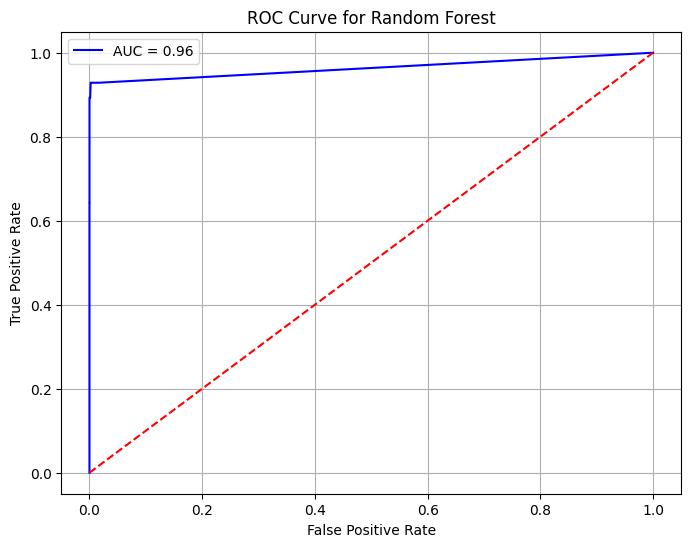

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='dashed')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


#E. Implimentation of Decision Tree Classifier and analysing the perfomance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


dtc = DecisionTreeClassifier(max_depth=None,criterion = 'gini',  min_samples_split=2, random_state=1234)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)

In [ ]:
 # import the metrics class
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[11873,     1],
       [   10,    18]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11874
         1.0       0.95      0.64      0.77        28

    accuracy                           1.00     11902
   macro avg       0.97      0.82      0.88     11902
weighted avg       1.00      1.00      1.00     11902

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 1.00
-------------------------------------------------------------------


##Visualize the model
Visualize the Decision Tree on Training Data

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_11 <= -5.01
|   |--- feature_8 <= -3.41
|   |   |--- feature_5 <= -5.02
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  -5.02
|   |   |   |--- feature_5 <= -4.50
|   |   |   |   |--- feature_16 <= 1.18
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_16 >  1.18
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  -4.50
|   |   |   |   |--- class: 1.0
|   |--- feature_8 >  -3.41
|   |   |--- feature_7 <= 1.73
|   |   |   |--- feature_9 <= -7.04
|   |   |   |   |--- feature_1 <= 2.26
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  2.26
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_9 >  -7.04
|   |   |   |   |--- class: 1.0
|   |   |--- feature_7 >  1.73
|   |   |   |--- feature_5 <= -2.49
|   |   |   |   |--- feature_9 <= -6.46
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_9 >  -6.46
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  -2.49
|   |   |   |   |--- class: 1.0

In [ ]:
with open("decistion_tree_train.log", "w") as fout:
 fout.write(text_representation)

# Specify feature names as a list

In [ ]:
print(np.unique(y_train))

[0. 1.]


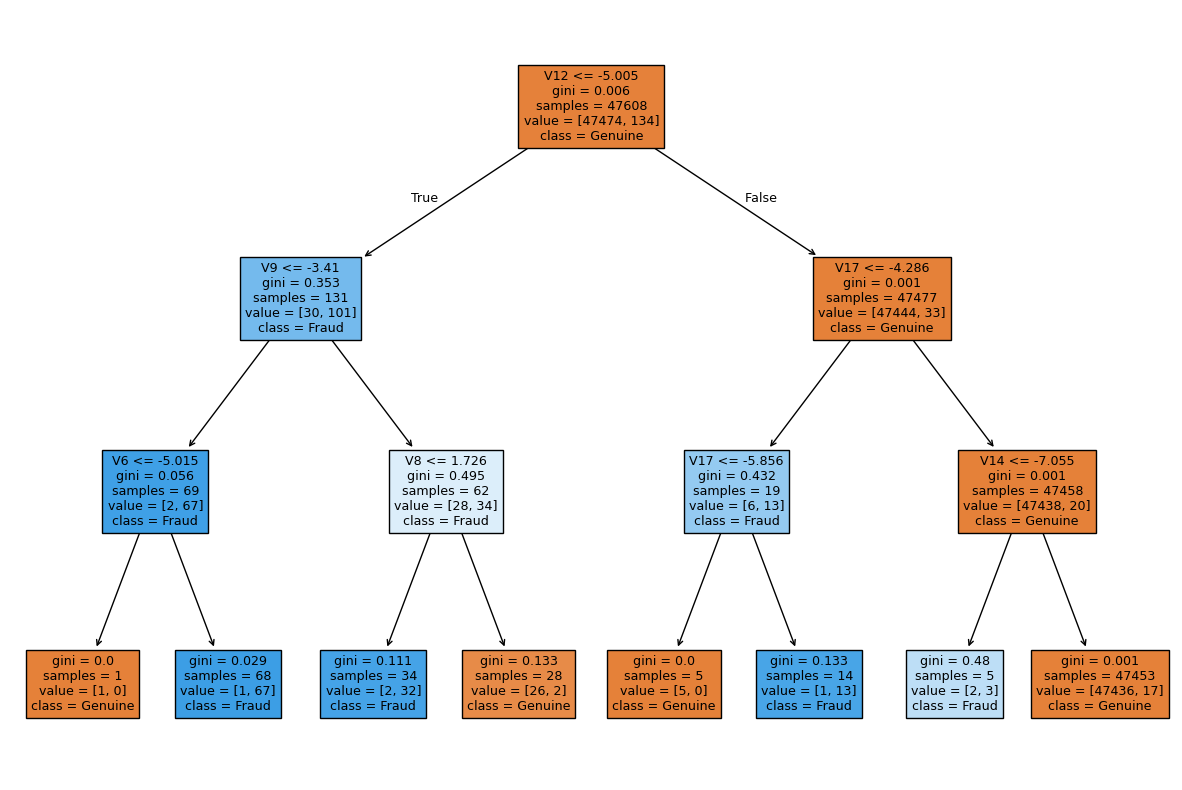

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

feature_names = X.columns.tolist()
class_names = ["Genuine", "Fraud"]

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True)

fig.savefig('decision_tree.png')
plt.show()

In [ ]:
fig.savefig("decistion_tree_train.png")

#Visualize the Decision Tree on Testing Data

In [ ]:
clf_test = DecisionTreeClassifier(random_state=1234)
dt_test = clf_test.fit(X_test, y_test)
text_representation = tree.export_text(clf_test)
print(text_representation)

|--- feature_14 <= -2.94
|   |--- feature_11 <= -2.26
|   |   |--- feature_5 <= -3.43
|   |   |   |--- feature_17 <= 1.57
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_17 >  1.57
|   |   |   |   |--- class: 1.0
|   |   |--- feature_5 >  -3.43
|   |   |   |--- class: 1.0
|   |--- feature_11 >  -2.26
|   |   |--- class: 0.0
|--- feature_14 >  -2.94
|   |--- feature_12 <= -5.97
|   |   |--- feature_6 <= 2.02
|   |   |   |--- class: 1.0
|   |   |--- feature_6 >  2.02
|   |   |   |--- class: 0.0
|   |--- feature_12 >  -5.97
|   |   |--- feature_0 <= -2.79
|   |   |   |--- feature_0 <= -2.79
|   |   |   |   |--- feature_15 <= 1.72
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_15 >  1.72
|   |   |   |   |   |--- feature_15 <= 1.73
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_15 >  1.73
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  -2.79
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  -2.79
|   |   |   

In [ ]:
with open("decistion_tree_test.log", "w") as fout:
 fout.write(text_representation)

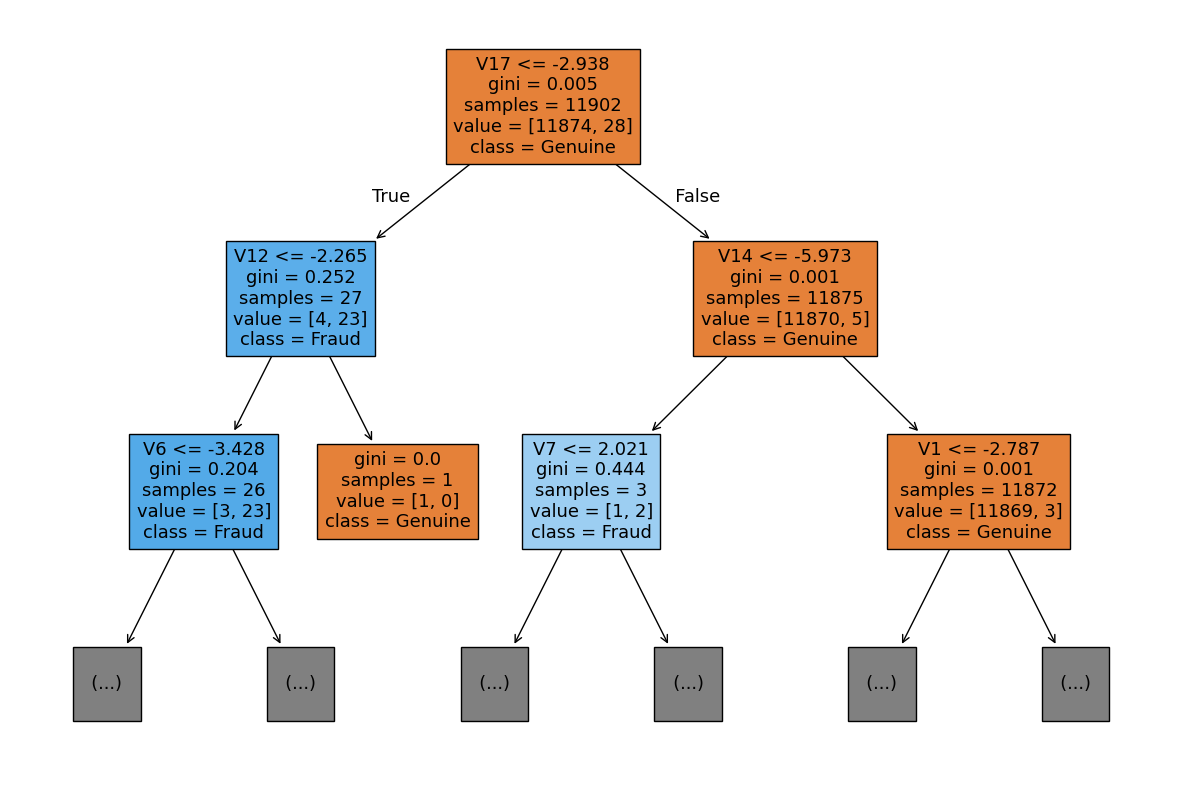

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf_test, feature_names=feature_names, class_names=class_names,filled=True,max_depth = 2)
fig.savefig('imagename1.png')

fig.savefig("decistion_tree_test.png")

#Visualize the Decision Tree on overall Data

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
dt = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= -5.01
|   |--- feature_8 <= -3.41
|   |   |--- feature_5 <= -5.02
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  -5.02
|   |   |   |--- feature_5 <= -4.52
|   |   |   |   |--- feature_16 <= 1.18
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_16 >  1.18
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  -4.52
|   |   |   |   |--- class: 1.0
|   |--- feature_8 >  -3.41
|   |   |--- feature_7 <= 1.73
|   |   |   |--- feature_9 <= -7.04
|   |   |   |   |--- feature_1 <= 2.26
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  2.26
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_9 >  -7.04
|   |   |   |   |--- class: 1.0
|   |   |--- feature_7 >  1.73
|   |   |   |--- feature_3 <= 6.17
|   |   |   |   |--- feature_11 <= -6.91
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_11 >  -6.91
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  6.17
|   |   |   |   |--- class: 1.0

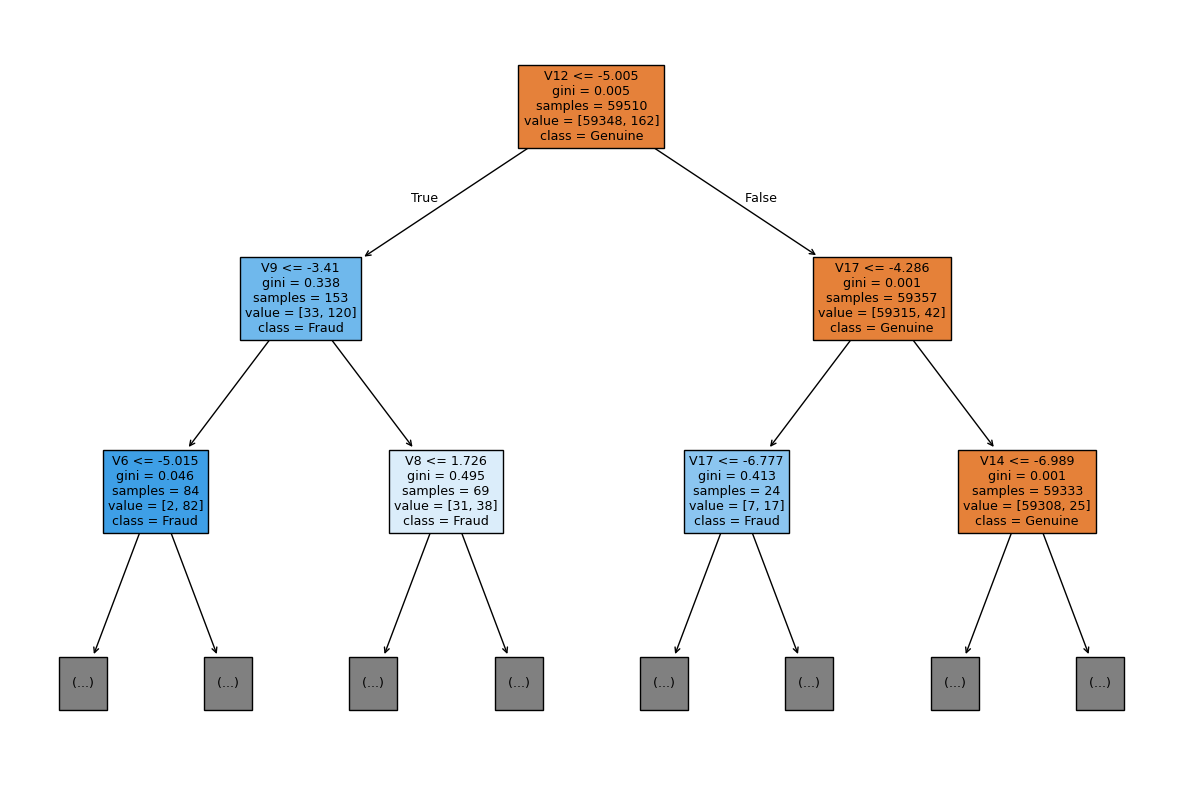

In [ ]:
# Write the textual representation of the tree to a log file
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

# Plot the decision tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, max_depth=2)

# Save the image of the decision tree
fig.savefig('decision_tree_image.png')

# Show the plot
plt.show()

##+++++++++++++++++++++++++++++++   THE END   +++++++++++++++++++++++++++++++++++